['1282', '2023']
 Fs=1282.0 hz
 Ts=0.00078003120124805 s


Text(0.5, 0, 'Tiempo (s)')

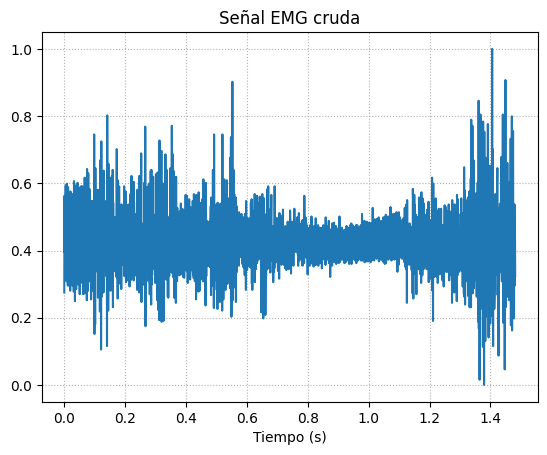

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

f = open("emg_brazo.txt")
raw_data = f.readlines()[1] # con f.read() leemos todo el contenido
f.close()

raw_data

x = re.findall("[0-5][0-9][0-9]\d", raw_data)

print(x)

Fs = float(x[0])
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")


SenalECG = np.genfromtxt("emg_brazo.txt", delimiter="\t",skip_header = 3)

# Conversión de las señales en arrays
ECG = SenalECG[:,5]
ECG = ECG [100:2000]

#Normalización
y1 = ECG  - np.min(ECG)
y1 = y1 / np.max(y1)
t1 = (np.arange(0,len(y1)) / Fs)

plt.plot(t1, y1)
plt.title("Señal EMG cruda")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")




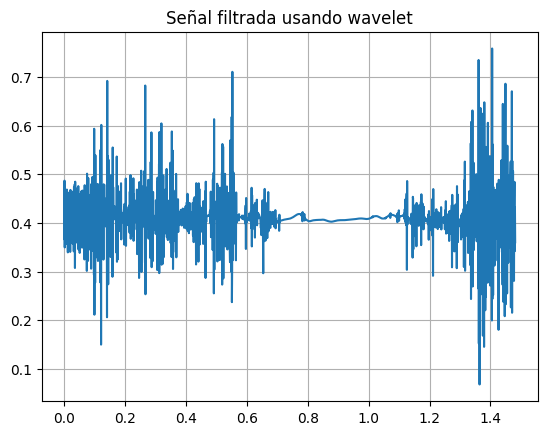

In [10]:
import pywt

coeffs = pywt.wavedec(y1, 'db6', level=5)
umbral = 0.1

# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'db6')

plt.title('Señal filtrada usando wavelet')
plt.plot(t1,senal_denoised)
plt.grid()